### 
NAME  : RAHINI DEVI S

ROLLNO: 225229129

PDL_CIA-II

#### 1. Import Libraries

In [22]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU,SimpleRNN # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
from tensorflow.keras.layers import Bidirectional

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exam26\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stops = set(stopwords.words('english'))

#### 2. Load Dataset

In [4]:
train = pd.read_csv('jigsaw-toxic-comment-train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.shape

(223549, 8)

In [6]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
train.severe_toxic.value_counts()

severe_toxic
0    221587
1      1962
Name: count, dtype: int64

#### 3. Preprocessing

In [8]:
def load_dataset():
    df = pd.read_csv('jigsaw-toxic-comment-train.csv')
    X = df['comment_text']      
    y = df['severe_toxic']   
    X = X.replace({'<.*?>': ''}, regex = True)          
    X = X.replace({'[^A-Za-z]': ' '}, regex = True)     
    X = X.apply(lambda review: [w for w in review.split() if w not in english_stops])  
    X = X.apply(lambda review: [w.lower() for w in review])
    return X, y

X,y = load_dataset()

#### 4. Train, Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
def get_max_length():
    review_length = []
    for comment_text in x_train:
        review_length.append(len(comment_text))
    return int(np.ceil(np.mean(review_length)))

#### 5. Tokenizing

In [11]:
token = Tokenizer(lower=False)    
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1 

In [12]:
total_words

195038

#### 6. LSTM

In [13]:
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 32)            6241216   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,270,273
Trainable params: 6,270,273
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(x_train, y_train, batch_size = 128,epochs=2)
model.evaluate(x_test,y_test)

Epoch 1/2
1398/1398 [==============================] - 108s 75ms/step - loss: 0.0555 - accuracy: 0.9906
Epoch 2/2
1398/1398 [==============================] - 7s 5ms/step - loss: 0.0399 - accuracy: 0.9914


[0.03992374613881111, 0.9914113283157349]

#### 6. GRU

In [15]:
EMBED_DIM = 32
GRU_OUT = 64

model1 = Sequential()
model1.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model1.add(GRU(GRU_OUT))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 39, 32)            6241216   
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,264,257
Trainable params: 6,264,257
Non-trainable params: 0
_________________________________________________________________


In [16]:
history2 = model1.fit(x_train, y_train, batch_size = 128,epochs=2)
model1.evaluate(x_test,y_test)

Epoch 1/2
1398/1398 [==============================] - 107s 75ms/step - loss: 0.0407 - accuracy: 0.9899
Epoch 2/2
1398/1398 [==============================] - 8s 5ms/step - loss: 0.0229 - accuracy: 0.9913


[0.022864291444420815, 0.9912770986557007]

#### 7. RNN

In [23]:
EMBED_DIM = 32
RNN_OUT = 64

model2 = Sequential()
model2.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model2.add(SimpleRNN(GRU_OUT))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 39, 32)            6241216   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,251,649
Trainable params: 6,251,649
Non-trainable params: 0
_________________________________________________________________


In [24]:
history3 = model2.fit(x_train, y_train, batch_size = 128,epochs=2)
model2.evaluate(x_test,y_test)

Epoch 1/2
1398/1398 [==============================] - 90s 63ms/step - loss: 0.0509 - accuracy: 0.9909
Epoch 2/2
1398/1398 [==============================] - 4s 3ms/step - loss: 0.0402 - accuracy: 0.9914


[0.0402495414018631, 0.9914113283157349]

#### 8. Model Comparision

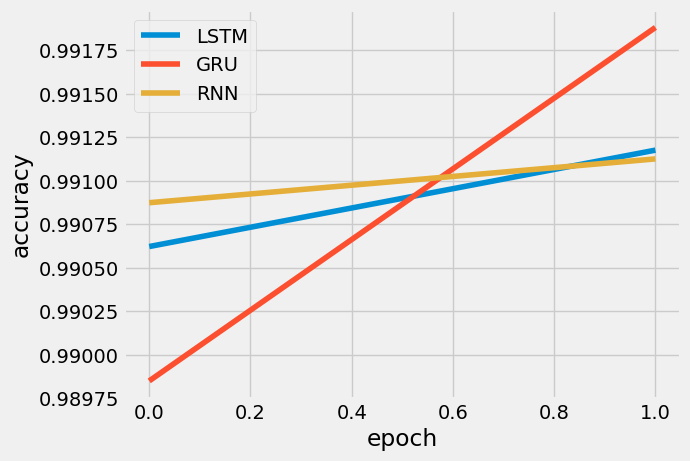

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM', 'GRU','RNN'], loc = 'upper left')
plt.show()  